# 🧠 L2D Final Project

For your final project, please choose a pre-prepared dataset, or one of your own that you deem suitable, and demonstrate the following analyses, methods and techniques previously covered across the breadth of the whole L2D course.

1. Data handling - characterisation of the dataset
2. Dimensionality reduction using PCA
3. Clustering using GMM or KMEANS
4. Classification (if labels are available)

## 📋 Tips:

- Use the headings and checklists below to guide you, and use these to help you structure your work.

- Feel free to make use of markdown cells to add explanation and justification for any choices you have made, and keep in mind best practices for structuring your code, annotating it where necessary, with relevant comments.

- For those using their own data, supporting explanation will help us to understand and best assess your work and reasoning.

# 📈 Data Handling:

## Import Data and Generic Checks

- Import data as a Pandas DataFrame
- Print the data types to find categorical columns
- Print all column labels
- Print the head of the DataFrame
- Check for missing values
- Drop rows (if any) that contain missing values
- Remove outliers
- Convert data to NumPy array
- Pick relevant columns
- Print shape of NumPy array
- Make a boxplot

In [1]:
# Import all the necessary functions needed in this task 
import seaborn as sns
import dcor
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score,silhouette_score, adjusted_rand_score



In [2]:
# Import data as a Pandas DataFrame
df = read_csv("data/breast_cancer.csv")

In [3]:
# Print the data types to find categorical columns
print("Data Types:")
print(df.dtypes)

Data Types:
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave 

In [4]:
# Print all column labels
print("\nColumn Labels:")
print(df.columns)


Column Labels:
Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [5]:
# Print the head of the DataFrame
print("\nFirst 5 Rows:")
print(df.head())


First 5 Rows:
   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          0        17.99         10.38          122.80     1001.0   
1          0        20.57         17.77          132.90     1326.0   
2          0        19.69         21.25          130.00     1203.0   
3          0        11.42         20.38           77.58      386.1   
4          0        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         

In [6]:
# Check for missing values in each column 
print("Missing values per column: ")
print(df.isnull().sum())

Missing values per column: 
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [7]:
# Print the shape of the DataFrame before modyfying it, to later see any effects on it's shape 
print(df.shape)

(569, 31)


In [8]:
# Drop rows (if any) that contain missing values
df_missing_data = df.dropna()
print("Shape of the Data Frame after the removal of rows that might contain missing values: ", df_missing_data.shape)

Shape of the Data Frame after the removal of rows that might contain missing values:  (569, 31)


In [9]:
# Remove outliers (IQR method)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 -Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]   
for col in df_missing_data.select_dtypes(include=["float64","int64"]).columns:
    df_cleaned = remove_outliers(df_missing_data,col)
print("Shape of the Data Frame after removing outliers: ", df_cleaned.shape)

Shape of the Data Frame after removing outliers:  (545, 31)


In [10]:
# Before converting data to NumPy array, for future use, 
# create a storage of column names that exclude any columns where all values = 0 
column_names = df_cleaned.columns[df_cleaned.any()]
print(column_names)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [11]:
# Convert the cleaned Data Frame to NumPy array
data_array = np.array(df_cleaned)

In [12]:
# Remove columns that only contain zero values, leaving only relevant columns 
relevant_data = data_array[:, ~(data_array == 0).all(axis = 0)]

In [13]:
# Print the new shape of NumPy converted data
print("Finalized shape of the NumPy array dataset after cleansing: {}". format(relevant_data.shape))

Finalized shape of the NumPy array dataset after cleansing: (545, 31)


In [14]:
# Initialize the scaler
scaler = StandardScaler()

# Standardize the NumPy array
# - Standardization rescales the data so that each feature has a mean of 0 and a standard deviation of 1
# - This helps improve the performance of machine learning algorithms that are sensitive to feature scaling
standardized_data = scaler.fit_transform(relevant_data)
print("Shape of the Standardized cleansed data set: ", standardized_data.shape)

Shape of the Standardized cleansed data set:  (545, 31)


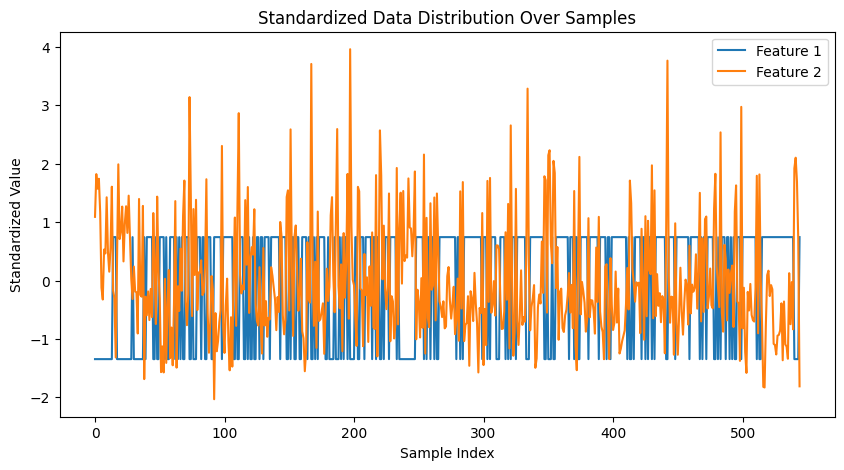

In [15]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot two feature columns of the standardized dataset
ax.plot(standardized_data[:, 0], label="Feature 1")
ax.plot(standardized_data[:, 1], label="Feature 2")

# Add labels and title
ax.set_xlabel("Sample Index")
ax.set_ylabel("Standardized Value")
ax.set_title("Standardized Data Distribution Over Samples")


ax.legend()
plt.show()

Note:

Through this project this standerdized cleansed data set, will be called "original" for the sake of easier interpretation and 
later comparison usage. As well as, it will be used in all further modifications and statsitical displays.

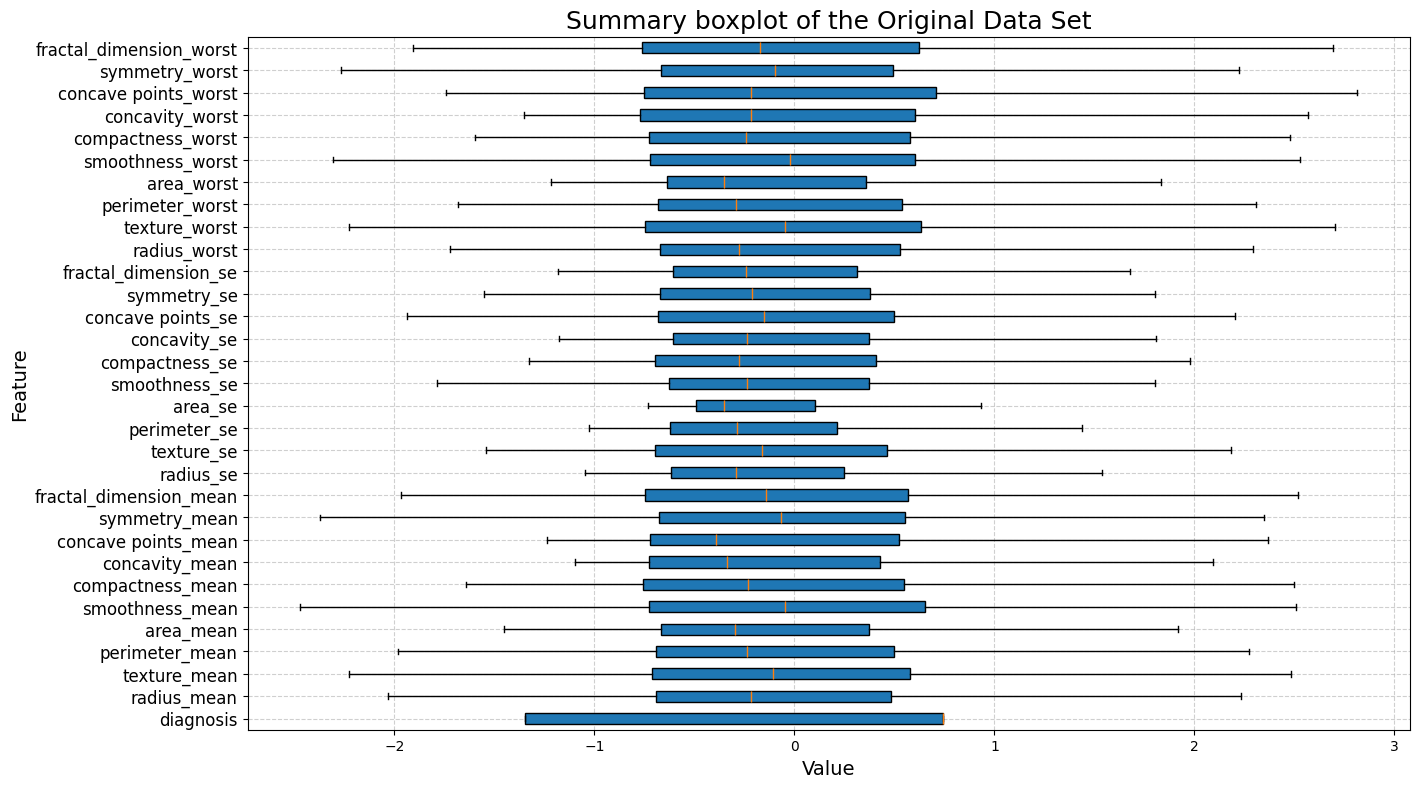

In [16]:
# Create a mapping of feature indices to column names
# This helps in future for labeling the y-axis properly with feature names
feature_mapping = {i+1: col for i, col in enumerate(column_names)}

# Set the figure size for better readability
plt.figure(figsize=(15, 9))

# Create a box plot of the standardized data
plt.boxplot(standardized_data, vert=False, patch_artist=True, showfliers=False)

# Set the title of the plot
plt.title("Summary boxplot of the Original Data Set", fontsize=18)

# Label the x-axis and y-axis
plt.xlabel("Value", fontsize=14)
plt.ylabel("Feature", fontsize=14)

# Set y-axis tick labels to correspond to the feature names
plt.yticks(range(1, len(feature_mapping) + 1), feature_mapping.values(), fontsize=12)

# Add grid lines to improve readability and display the plot 
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


### Create Summary Statistics (Univariate):

In [17]:
# Compute key summary statistics for each feature in the standardized dataset
mean = np.mean(standardized_data, axis=0)  # Mean of each column
median = np.median(standardized_data, axis=0)  # Median of each column
std_dev = np.std(standardized_data, axis=0)  # Standard deviation (spread of data)
min_val = np.min(standardized_data, axis=0)  # Minimum value in each column 
max_val = np.max(standardized_data, axis=0)  # Maximum value in each column 
q1 = np.percentile(standardized_data, 25, axis=0)  # 25th percentile (Q1 - lower quartile)
q3 = np.percentile(standardized_data, 75, axis=0) # 75th percentile (Q3 - upper quartile)

In [18]:
# Create a DataFrame to neatly display the above calculated statistics
summary_df = pd.DataFrame({
    "Mean": mean,
    "Median": median,
    "Std Dev": std_dev,
    "Min": min_val,
    "Max": max_val,
    "Q1 (25th percentile)": q1,
    "Q3 (75th percentile)": q3
}, index= column_names)

# Demonstrate a data example of the new calculated statistics 
print(summary_df.head())

                        Mean    Median  Std Dev       Min       Max  \
diagnosis       5.214993e-17  0.743442      1.0 -1.345094  0.743442   
radius_mean     5.997241e-16 -0.216912      1.0 -2.031491  3.960108   
texture_mean   -1.629685e-16 -0.104842      1.0 -2.228225  4.702064   
perimeter_mean -1.825247e-16 -0.238717      1.0 -1.981155  3.967138   
area_mean       3.911244e-17 -0.297545      1.0 -1.452507  5.217809   

                Q1 (25th percentile)  Q3 (75th percentile)  
diagnosis                  -1.345094              0.743442  
radius_mean                -0.690478              0.483512  
texture_mean               -0.714202              0.577171  
perimeter_mean             -0.691282              0.497883  
area_mean                  -0.669329              0.372457  


<Figure size 1000x600 with 0 Axes>

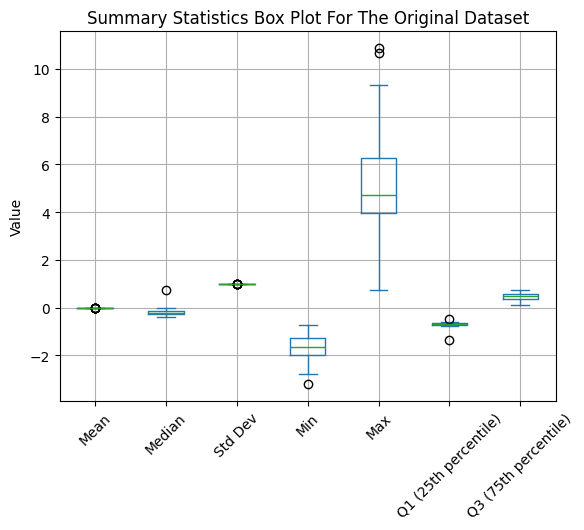

In [19]:
# Plot a boxplot to vesualize the statistic summary 
plt.figure(figsize=(10, 6))
summary_df.plot(kind="box")

# Customizing the plot
plt.title("Summary Statistics Box Plot For The Original Dataset")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

### Plot the Correlation Matrix (Bivariate):

In [20]:
# Compute the correlation matrix
correlation_matrix = np.corrcoef(standardized_data, rowvar=False)  # rowvar=False to compute correlations between columns

# Print the correlation matrix
print(correlation_matrix)

[[ 1.00000000e+00 -7.49816197e-01 -4.04241795e-01 -7.58962052e-01
  -7.29718571e-01 -3.42612652e-01 -5.91746846e-01 -7.05683222e-01
  -7.76257611e-01 -3.10969889e-01  7.04076123e-02 -5.87759623e-01
  -4.75144512e-03 -5.74576889e-01 -5.64881105e-01  5.29032491e-02
  -2.82312193e-01 -3.03395969e-01 -4.37025963e-01  1.24420015e-02
  -7.65467985e-02 -7.90048807e-01 -4.38624492e-01 -7.93857560e-01
  -7.49017613e-01 -4.01380299e-01 -6.00373668e-01 -6.72317300e-01
  -7.88445899e-01 -3.85208419e-01 -2.94192628e-01]
 [-7.49816197e-01  1.00000000e+00  3.13007340e-01  9.98021594e-01
   9.87320360e-01  2.04503204e-01  5.60930432e-01  7.25639831e-01
   8.41397002e-01  1.71910097e-01 -3.12372172e-01  6.85659223e-01
  -8.64551909e-02  6.78443241e-01  7.37324460e-01 -2.07324259e-01
   2.47201974e-01  2.75250247e-01  4.17999012e-01 -9.29343148e-02
   5.05779711e-04  9.70105377e-01  2.95094849e-01  9.66633550e-01
   9.40680372e-01  1.52377494e-01  5.03775493e-01  6.05719626e-01
   7.78070869e-01  1.9090

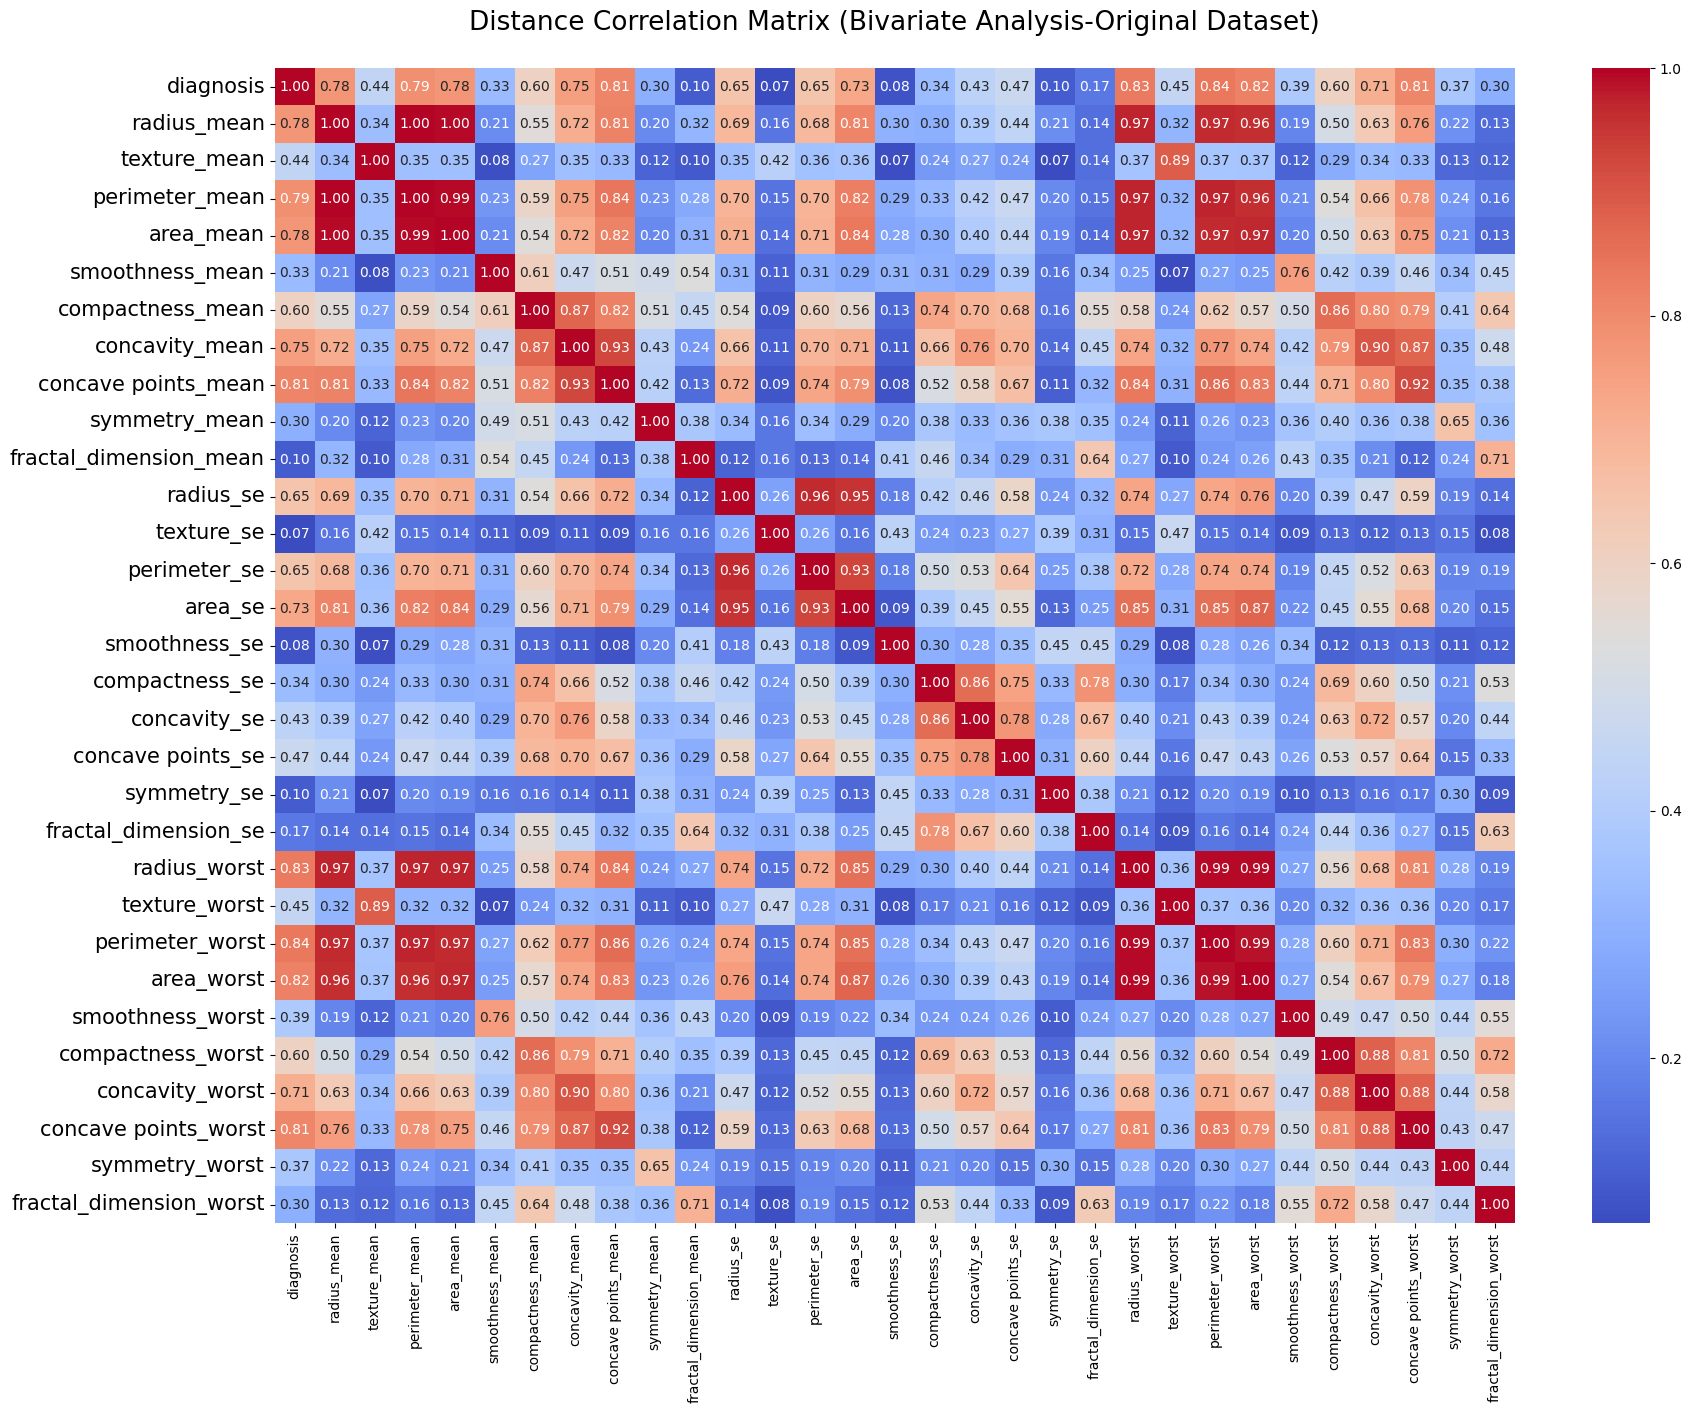

In [21]:
# Function to compute the Distance Correlation Matrix
def distance_correlation_matrix(data):
    n_features = data.shape[1]  # Number of features
    dist_corr_matrix = np.zeros((n_features, n_features))  # Initialize matrix

    for i in range(n_features):
        for j in range(n_features):
            dist_corr_matrix[i, j] = dcor.distance_correlation(data[:, i], data[:, j])

    return dist_corr_matrix

# Compute Distance Correlation Matrix for the earlier standardized data 
dist_corr_matrix = distance_correlation_matrix(standardized_data) 

# Plot the Distance Correlation Matrix
plt.figure(figsize=(20, 15))
sns.heatmap(dist_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=column_names, yticklabels=column_names)
plt.yticks(fontsize=15, rotation=0)
plt.title("Distance Correlation Matrix (Bivariate Analysis-Original Dataset)\n", size = 19)
plt.show()

# Dimensionality Reduction:

Checkpoints and Guidance:

- Use PCA on all components
- Plot explained variance as a function of component
- Calculate the number of components required to keep a specified amount of the variance
- Create a labels array
- Make a scatter plot of the main components


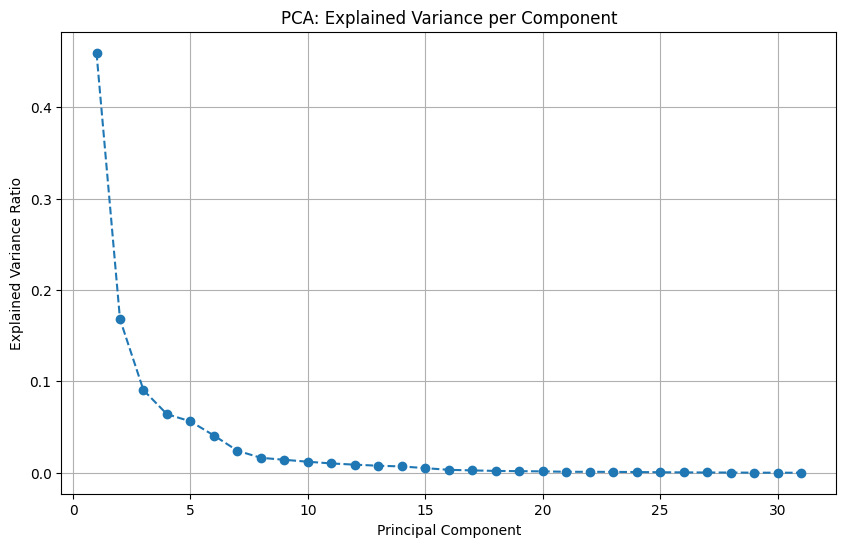

In [22]:
# Initialize PCA model
pca = PCA()  

# Fit PCA on the standardized dataset and transform it into principal components
principal_components = pca.fit_transform(standardized_data)  

# Extract the explained variance ratio of each principal component
explained_variance = pca.explained_variance_ratio_

# Create a plot to visualize explained varience per principle component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')

# Plot principle components against explained varience 
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA: Explained Variance per Component')
plt.grid(True) # Add grid lines for better readability 
plt.show() # Dispaly the plot

In [23]:
# Compute cumulative variance to determine how many components retain 99% of the variance 
cumulative_variance = np.cumsum(explained_variance)  # Cumulative sum of explained variance

# Find the index where the cumulative variance reaches or exceeds 99% 
num_components = np.argmax(cumulative_variance >= 0.99) + 1  

# Display the findings 
print(f"Number of components to retain 99% variance: {num_components}")

Number of components to retain 99% variance: 18


In [24]:
# Create labels for the principle components, syncing with the original column names of the data frame 
component_labels = [f"{column_names[i]}" for i in range(num_components)]

In [25]:
# Identify "true_labels" for the later use 
true_labels = df_cleaned["diagnosis"].values

In [26]:
# Apply PCA transformation using the selected number of components 
# Retain only the number of top principle components baseed on the variance threshold
num_components = 18  
pca_transformed = pca.transform(standardized_data)[:, :num_components]

# Convert the transformed PCA data into DataFrame for easier visualization
pca_df = pd.DataFrame(pca_transformed, columns=component_labels)

# Display first few rows
print(pca_df.head())

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0   9.792030     3.160225     -2.182870       -3.131185   1.581723   
1   2.885624    -3.539855     -0.523839       -1.145407  -0.352208   
2   6.271255    -0.536482     -0.812356       -0.727330   0.312823   
3   4.463919    -1.349115      1.094708       -2.967472  -0.034436   
4   2.751432    -2.640809     -1.669424        0.082718   0.019201   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         1.168446          2.506923        0.191112            -0.456068   
1        -0.093811          0.272488       -0.355961             1.561228   
2         0.555841         -0.498355       -0.024745             0.335882   
3        -1.403367         -1.189307       -0.591133             0.678551   
4        -0.150713         -0.198992       -0.169439             0.441215   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0      -1.003854               -0.4

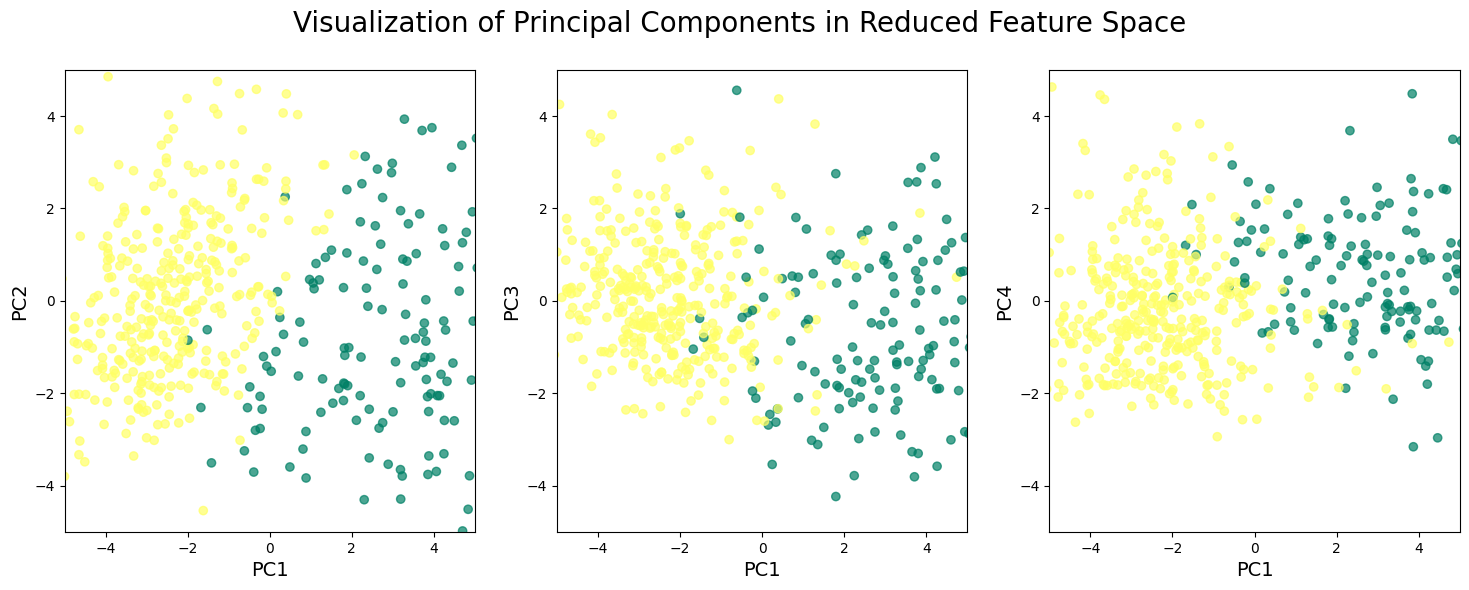

In [27]:
# Select the first few principal components for scatter plot visualization
pc1 = pca_transformed[:, 0]  
pc2 = pca_transformed[:, 1]  
pc3 = pca_transformed[:, 2]  
pc4 = pca_transformed[:, 3]  

# Use class label for color coding 
c_labels = true_labels  

# Create a figure with subplots
fig, ax = plt.subplots(ncols=3, figsize=(18, 6))
fig.suptitle('Visualization of Principal Components in Reduced Feature Space', fontsize=20)

# PC1 vs PC2
ax[0].scatter(pc1, pc2, c=c_labels, cmap='summer', alpha=0.7)
ax[0].set_xlabel('PC1', fontsize=14)
ax[0].set_ylabel('PC2', fontsize=14)
ax[0].set_xlim([-5, 5])
ax[0].set_ylim([-5, 5])

# PC1 vs PC3
ax[1].scatter(pc1, pc3, c=c_labels, cmap='summer', alpha=0.7)
ax[1].set_xlabel('PC1', fontsize=14)
ax[1].set_ylabel('PC3', fontsize=14)
ax[1].set_xlim([-5, 5])
ax[1].set_ylim([-5, 5])

# PC1 vs PC4
ax[2].scatter(pc1, pc4, c=c_labels, cmap='summer', alpha=0.7)
ax[2].set_xlabel('PC1', fontsize=14)
ax[2].set_ylabel('PC4', fontsize=14)
ax[2].set_xlim([-5, 5])
ax[2].set_ylim([-5, 5])

plt.show()

In [28]:
# Create a DataFrame with selected principal components

#pca_df_selected = pd.DataFrame(pca_transformed[:, :18], columns=[f'PC{i+1}' for i in range(18)])

# Add labels for coloring

#pca_df_selected["Labels"] = true_labels  

# Pairwise scatter plot using seaborn (to show the general trend)
#sns.set_context("notebook", font_scale = 2.3)
#sns.pairplot(pca_df_selected, hue="Labels", plot_kws={"alpha":0.5, "s":20}, diag_kind="kde")

#plt.suptitle("Pairwise Scatter Plots of 18 Principal Components", fontsize=27, y=1.02)
#plt.show()

Note:

The code above, where I attempted to visualize general trends by plotting pairwise scatter plots for all 18 Principal Components, took a long time to execute and occasionally caused the kernel to crash. Due to these computational limitations, I have commented out this step. However, I have included the code to demonstrate how I would have carried out this step if such constraints were not an issue.

# ⚙️ Clustering:

- Use the GMM or KMEANS algorithm
- Test different numbers of components
- Assess using adjusted rand score (if labels are available)
- Plot data in scatterplot using the predicted labels

In [29]:
# Identify the "true_labels" variable for the later usage 
true_labels = df_cleaned["diagnosis"].values

In [30]:
# Loop through cluster values from 2 to 5
for n_clusters in range(2, 6):
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)

    # Fit the model and predict cluster labels
    labels = gmm.fit_predict(standardized_data)  

    # Compute and display the Silhouette Score
    silhouette = silhouette_score(standardized_data, labels)

    # Compute and display the Adjusted Rand Score (since true labels are available)
    ari = adjusted_rand_score(true_labels, labels)

    print(f'Clusters: {n_clusters}, Silhouette Score: {silhouette}, Adjusted Rand Score: {ari}')

Clusters: 2, Silhouette Score: 0.32342775441461524, Adjusted Rand Score: 0.9706296859286424
Clusters: 3, Silhouette Score: 0.2174824304463093, Adjusted Rand Score: 0.7216240484172133
Clusters: 4, Silhouette Score: 0.2220872681220428, Adjusted Rand Score: 0.6509844204966548
Clusters: 5, Silhouette Score: 0.17917773313035704, Adjusted Rand Score: 0.4589260413504246


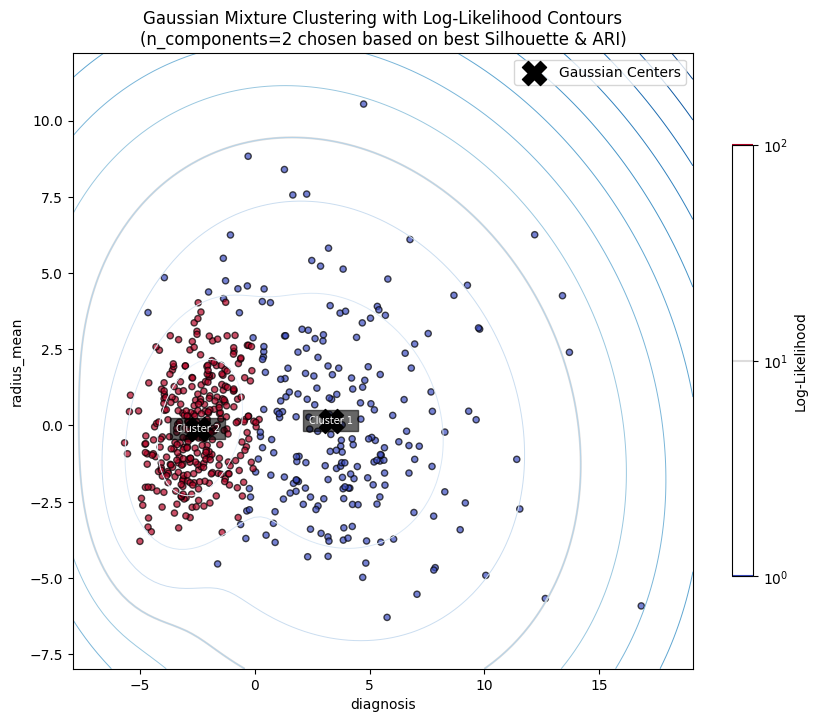

In [31]:
# Ensure 2D data is selected
# Selecting the first two principal components for visualization
data_2d = pca_df.iloc[:, :2].values  

# Initialize and fit Gaussian Mixture Model (GMM)
n_components = 2
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(data_2d)

# Define grid space for contour visualization
resolution = 100
margin_x = (data_2d[:, 0].max() - data_2d[:, 0].min()) * 0.1 # 10% margin on x-axis
margin_y = (data_2d[:, 1].max() - data_2d[:, 1].min()) * 0.1 # 10% margin on y-axis

# Generate evenly spaced values for the grid along each axis
vec_a = np.linspace(data_2d[:, 0].min() - margin_x, data_2d[:, 0].max() + margin_x, resolution)
vec_b = np.linspace(data_2d[:, 1].min() - margin_y, data_2d[:, 1].max() + margin_y, resolution)

# Create grid for density estimation
grid_a, grid_b = np.meshgrid(vec_a, vec_b)
XY_statespace = np.c_[grid_a.ravel(), grid_b.ravel()] # Flatten grid for GMM scoring

# Compute log likelihood of grid points under GMM
Z_score = gmm.score_samples(XY_statespace) # Log-likelihood of each grid point
Z_s = Z_score.reshape(grid_a.shape) # Reshape to match the grid dimensions
Z_s = np.abs(Z_s) # Taking absolute values to avoid log domain errors

# Plot contour map for Gaussian densities
fig, ax = plt.subplots(figsize=(10, 8))
contour = ax.contour(grid_a, grid_b, Z_s, levels=30, cmap="coolwarm", norm=LogNorm(vmin=1.0, vmax=100.0))
ax.contour(grid_a, grid_b, Z_s,levels=15, cmap="Blues", linewidths= 0.7)
fig.colorbar(contour, shrink=0.7,label="Log-Likelihood") # Add a colorbar for reference and interpretation 

# Scatter plot of predicted clusters
y_pred = gmm.predict(data_2d)
ax.scatter(data_2d[:, 0], data_2d[:, 1], c=y_pred, cmap="coolwarm", edgecolors='k', alpha=0.7, s=20)

# Mark GMM cluster centers
centers = gmm.means_
ax.scatter(centers[:, 0], centers[:, 1], c="black", s=300, marker="X", label="Gaussian Centers")

# Annotate centers
for i, (x, y) in enumerate(centers):
    ax.text(x, y, f'Cluster {i+1}', fontsize=7, ha='center', va='center', color='white', bbox=dict(facecolor='black', alpha=0.6))

# Axis labels and title
ax.set_xlabel(component_labels[0]) 
ax.set_ylabel(component_labels[1])
ax.set_title("Gaussian Mixture Clustering with Log-Likelihood Contours\n(n_components=2 chosen based on best Silhouette & ARI)")
ax.legend(loc="upper right")
ax.set_facecolor("white")

# Display the plot
plt.show()

# 🏷️ Classification:

- Train a number of classifiers from the scikit-learn library
- Obtain the `.score` and compare the outcome for the classifiers
- Train a number of classifiers and plot the ROC `roc_curve`, with the score obtained from `roc_auc_score`
- Repeat the above workflow with reduced data after PCA, and compare the results
- Pick the classifier that scores highest, fit this to the data (original and reduced) and plot the feature importances



In [32]:
# Identify the data sets, separating them into to distinct groups of standardized data and PCA applied(reduced) data 
X_original = standardized_data
X_reduced = data_2d
y = y_pred

In [33]:
# Display the shape of the data sets to make sure that the format is correct 
print(X_original.shape)
print(X_reduced.shape)
print(y.shape)

(545, 31)
(545, 2)
(545,)


In [34]:
# Define and create the classifiers dictionary, which will be utilized in future 
RANDOM_STATE = 123

classifiers = {
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE),
    'AdaBoost (Random Forest)': AdaBoostClassifier(RandomForestClassifier(random_state=RANDOM_STATE)),
    'Extra Trees': ExtraTreesClassifier(random_state=RANDOM_STATE),
    'AdaBoost (Extra Trees)': AdaBoostClassifier(ExtraTreesClassifier(random_state=RANDOM_STATE)),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_STATE),
    'SVC (RBF)': SVC(kernel='rbf', random_state=RANDOM_STATE),
    'SVC (Linear)': SVC(kernel='linear', random_state=RANDOM_STATE),
    'Multi-layer Perceptron': MLPClassifier(max_iter=5000, random_state=RANDOM_STATE),
    'K-Neighbors': KNeighborsClassifier()
}

Note:

The application of the Stratified Shuffle Split function is essential before carrying out the ".score()" function. As classifier evaluation of the model performance (e.g., accuracy) on test data, would be unreliable if we don’t split the data into separate test sets.

### Performance on Original Data

In [35]:
# Define the number of splits for cross-validation
n_splits = 10  # Number of splits
test_size = 0.2  # 20% test size
train_size = 0.8  # 80% train size

# Initialize stratified shuffle split to ensure class distribution remains the same
sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=RANDOM_STATE)

# Generate and store train-test split indices (to ensure X and y remain aligned)
split_data_indices = list(sss.split(X_original, y_pred))  

# Extract the first split from the generated indices
train_idx, test_idx = split_data_indices[0]

# Create training and testing sets based on indices
X_train_orig, X_test_orig = X_original[train_idx], X_original[test_idx]
y_train_orig, y_test_orig = y[train_idx], y[test_idx]

# Display the shape of training and test data
print("Training data shape:", X_train_orig.shape)
print("Test data shape:", X_test_orig.shape)
print("Training labels shape:", y_train_orig.shape)
print("Test labels shape:", y_test_orig.shape)

Training data shape: (436, 31)
Test data shape: (109, 31)
Training labels shape: (436,)
Test labels shape: (109,)


In [36]:
# Initialize an empty dictionary to store classifier scores
scores = {}

# Iterate over each classifier defined in the classifiers dictionary
for name, clf in classifiers.items():

    # Train the classifier on the training data(obtained from the original/standerdized data set)
    clf.fit(X_train_orig, y_train_orig) 

    # Evaluate the classifier on the test data
    score = clf.score(X_test_orig, y_test_orig)

    # Store the score for each classifier
    if name not in scores:
        scores[name] = []
        scores[name].append(score)

In [37]:
# Compute the average score for each classifier across multiple splits
avg_scores_orig = {name: np.mean(score_list) for name, score_list in scores.items()}

# Print the average performance of each classifier
for name, score in avg_scores_orig.items():
    print(f"{name} - Avg Score: {score:.2f}")


Random Forest - Avg Score: 0.98
AdaBoost (Random Forest) - Avg Score: 0.97
Extra Trees - Avg Score: 0.98
AdaBoost (Extra Trees) - Avg Score: 0.98
Decision Tree - Avg Score: 0.93
SVC (RBF) - Avg Score: 0.98
SVC (Linear) - Avg Score: 0.99
Multi-layer Perceptron - Avg Score: 0.99
K-Neighbors - Avg Score: 0.97


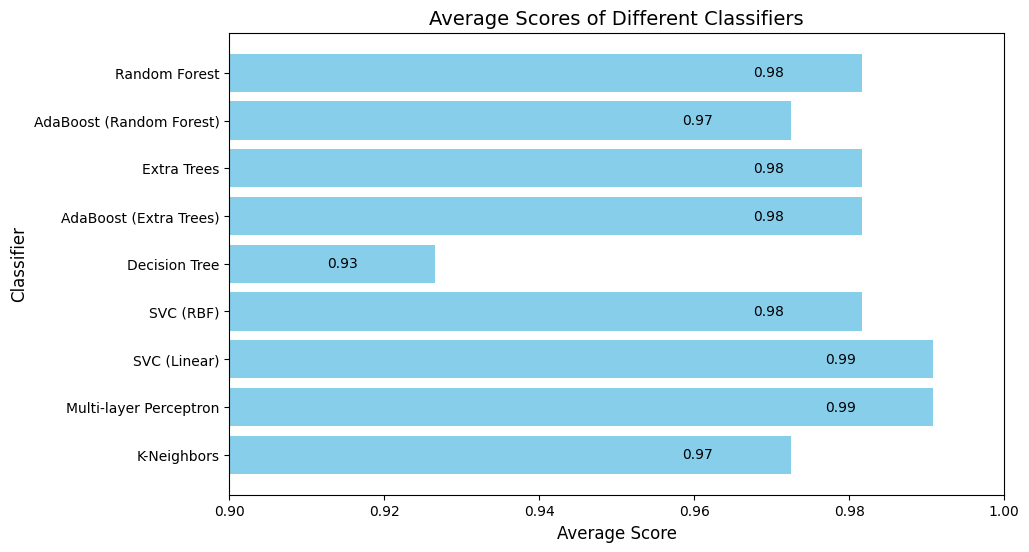

In [38]:
# Convert earlier created dictionary keys and values to lists
classifiers_list = list(avg_scores_orig.keys())
scores_list_orig = list(avg_scores_orig.values())

# Ensure all scores in the newly created lists are converted to float
scores_list_orig = [float(score) for score in scores_list_orig] 

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.barh(classifiers_list, scores_list_orig, color='skyblue')
plt.xlabel("Average Score", fontsize=12)
plt.ylabel("Classifier", fontsize=12)
plt.title("Average Scores of Different Classifiers", fontsize=14)
plt.xlim(0.9, 1.0)  

# Display the values on the bars
for index, value in enumerate(scores_list_orig):
    plt.text(value - 0.01, index, f"{value:.2f}", va='center', ha='right', fontsize=10)

plt.gca().invert_yaxis() 
plt.show()

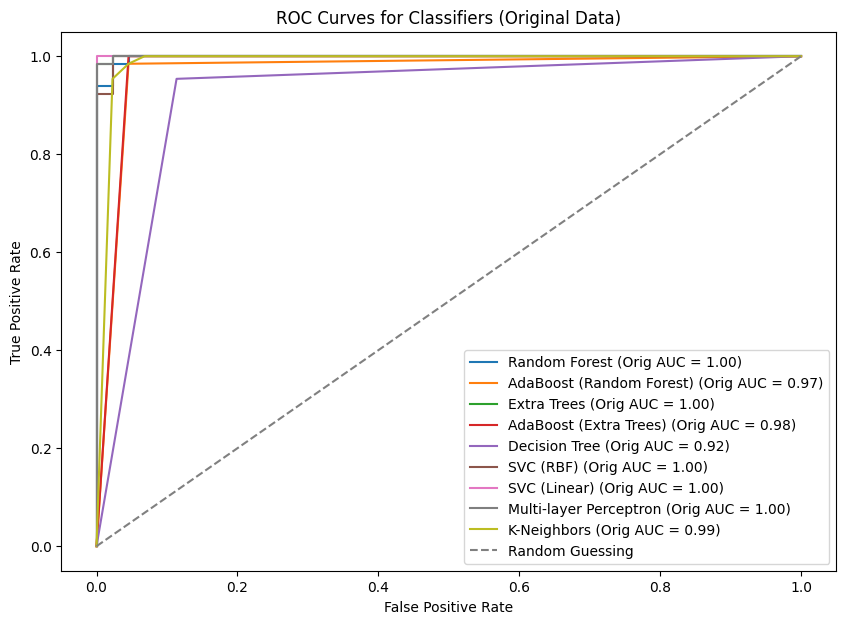

In [39]:
# Initialize figure for ROC Curves
plt.figure(figsize=(10, 7))

# Loop through the classifiers 
for name, clf in classifiers.items():
    
    # Train on original dataset 
    clf.fit(X_train_orig, y_train_orig)

    # Get probability estimates if available, else use decision function
    # Some classifiers (like logistic regression) provide probabilities using predict_proba()
    # Others (like SVM) provide decision scores using decision_function()
    if hasattr(clf, "predict_proba"):
        y_scores_orig = clf.predict_proba(X_test_orig)[:, 1]# Extract probability for the positive class
    else:
        y_scores_orig = clf.decision_function(X_test_orig)# Use decision function scores for non-probabilistic classifiers

    # Compute ROC curve and AUC score
    fpr_orig, tpr_orig, _ = roc_curve(y_test_orig, y_scores_orig)# Calculate False Positive Rate and True Positive Rate
    auc_score_orig = roc_auc_score(y_test_orig, y_scores_orig) # Compute Area Under the Curve (AUC)

    # Plot ROC curve for original dataset
    plt.plot(fpr_orig, tpr_orig, label=f"{name} (Orig AUC = {auc_score_orig:.2f})")

# Plot random guessing line
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guessing")

# Formatting the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Classifiers (Original Data)")
plt.legend()
plt.show()

### Performance on Reduced Data

In [40]:
# Define the number of splits for cross-validation
n_splits = 10  # Number of splits
test_size = 0.2  # 20% test size
train_size = 0.8  # 80% train size

# Initialize stratified shuffle split to ensure class distribution remains the same
sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=RANDOM_STATE)

# Generate and store train-test split indices (to ensure X and y remain aligned)
split_data_indices = list(sss.split(X_reduced, y_pred)) 

# Extract the first split from the generated indices
train_idx, test_idx = split_data_indices[0]

# Create training and testing sets based on indices
X_train_red, X_test_red = X_reduced[train_idx], X_reduced[test_idx]
y_train_red, y_test_red = y[train_idx], y[test_idx]

# Display the shape of training and test data
print("Training data shape:", X_train_red.shape)
print("Test data shape:", X_test_red.shape)
print("Training labels shape:", y_train_red.shape)
print("Test labels shape:", y_test_red.shape)

Training data shape: (436, 2)
Test data shape: (109, 2)
Training labels shape: (436,)
Test labels shape: (109,)


In [41]:
# Initialize an empty dictionary to store classifier scores
scores = {}

# Iterate over each classifier defined in the classifiers dictionary
for name, clf in classifiers.items():

    # Train the classifier on the training data(obtained from the original/standerdized data set)
    clf.fit(X_train_red, y_train_red)

    # Evaluate the classifier on the test data
    score = clf.score(X_test_red, y_test_red)

    # Store the score for each classifier
    if name not in scores:
        scores[name] = []
        scores[name].append(score)

In [42]:
# Compute the average score for each classifier across multiple splits
avg_scores_red = {name: np.mean(score_list) for name, score_list in scores.items()}

# Print the average performance of each classifier
for name, score in avg_scores_red.items():
    print(f"{name} - Avg Score: {score:.2f}")

Random Forest - Avg Score: 1.00
AdaBoost (Random Forest) - Avg Score: 1.00
Extra Trees - Avg Score: 1.00
AdaBoost (Extra Trees) - Avg Score: 1.00
Decision Tree - Avg Score: 1.00
SVC (RBF) - Avg Score: 0.99
SVC (Linear) - Avg Score: 0.97
Multi-layer Perceptron - Avg Score: 0.99
K-Neighbors - Avg Score: 0.98


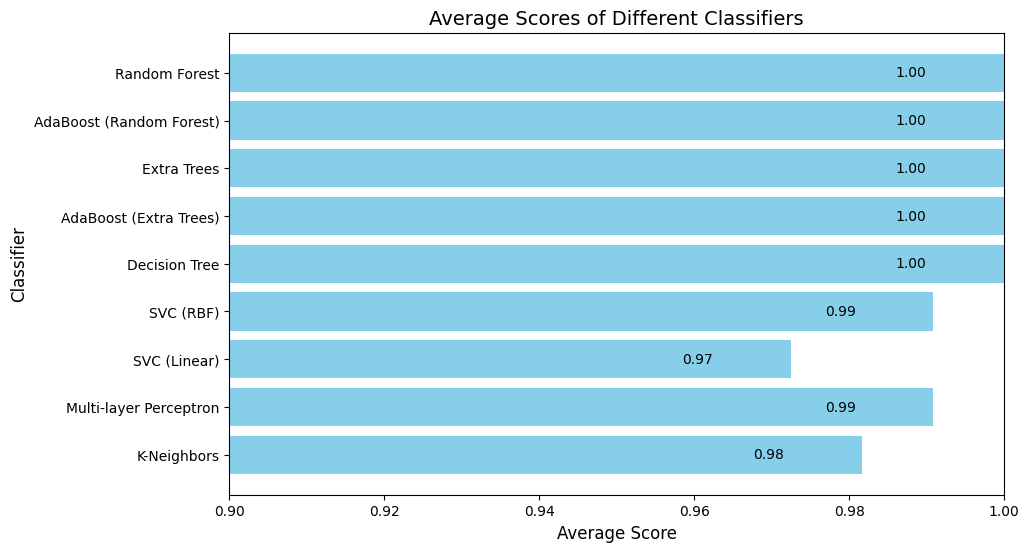

In [43]:
# Convert earlier created dictionary keys and values to lists
classifiers_list = list(avg_scores_red.keys())
scores_list_red = list(avg_scores_red.values())

# Ensure all scores in the newly created lists are converted to float
scores_list_red = [float(score) for score in scores_list_red]  

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.barh(classifiers_list, scores_list_red, color='skyblue')
plt.xlabel("Average Score", fontsize=12)
plt.ylabel("Classifier", fontsize=12)
plt.title("Average Scores of Different Classifiers", fontsize=14)
plt.xlim(0.9, 1.0) 

# Display the values on the bars
for index, value in enumerate(scores_list_red):
    plt.text(value - 0.01, index, f"{value:.2f}", va='center', ha='right', fontsize=10)

plt.gca().invert_yaxis() 
plt.show()

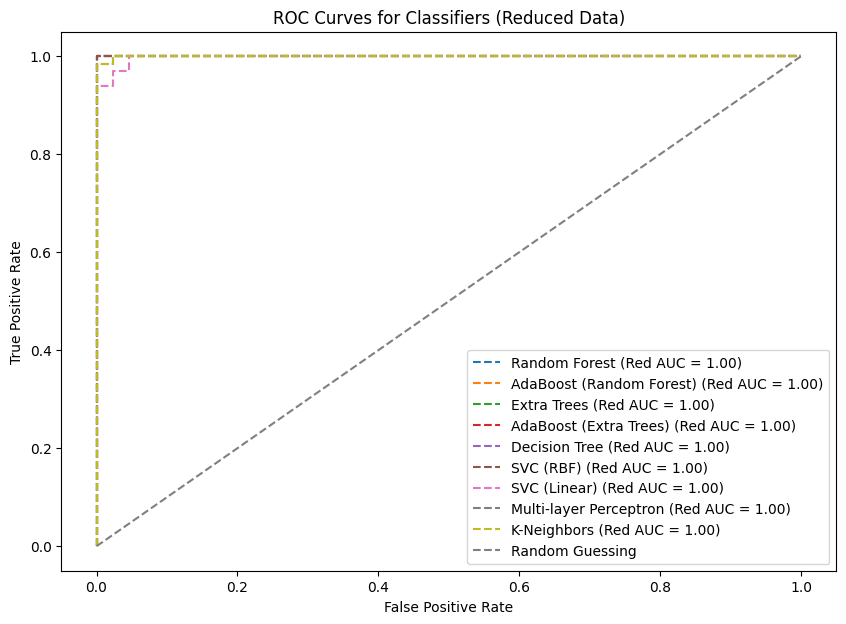

In [44]:
# Initialize figure for ROC Curves 
plt.figure(figsize=(10, 7))

# Loop through classifiers 
for name, clf in classifiers.items():
    
    # Train on reduced data set 
    clf.fit(X_train_red, y_train_red)

    # Get probability estimates if available, else use decision function
    # Some classifiers (like logistic regression) provide probabilities using predict_proba()
    # Others (like SVM) provide decision scores using decision_function()
    if hasattr(clf, "predict_proba"):
        y_scores_red = clf.predict_proba(X_test_red)[:, 1]  # Extract probability for the positive class
    else:
        y_scores_red = clf.decision_function(X_test_red) # Use decision function scores for non-probabilistic classifiers

    # Compute ROC curve and AUC score
    fpr_red, tpr_red, _ = roc_curve(y_test_red, y_scores_red) # Calculate False Positive Rate and True Positive Rate
    auc_score_red = roc_auc_score(y_test_red, y_scores_red) # Compute Area Under the Curve (AUC)

    # Plot ROC curve for reduced dataset
    plt.plot(fpr_red, tpr_red, linestyle="--", label=f"{name} (Red AUC = {auc_score_red:.2f})")

# Plot random guessing baseline
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guessing")

# Formatting the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Classifiers (Reduced Data)")
plt.legend()
plt.show()

Note:

I chose to use Stratified Shuffle Split for both obtaining the `.score()` and generating the ROC curve.
The reason for this choice is that Stratified Shuffle Split ensures that each training and test split maintains 
the same class distribution as the original dataset. This is especially important in cases where the dataset may 
be imbalanced, preventing biased model evaluations.

By using the same split for both `.score()` (accuracy evaluation) and ROC curve analysis, I ensure that 
the models are evaluated consistently under the same test conditions. This avoids discrepancies that could 
arise if different splits were used for accuracy and ROC metrics.

Given these considerations, in my opinion, using Stratified Shuffle Split for both tasks provides a fair, balanced, and efficient 
evaluation of classifier performance.

### Result Comparison Reduced vs Original Data 

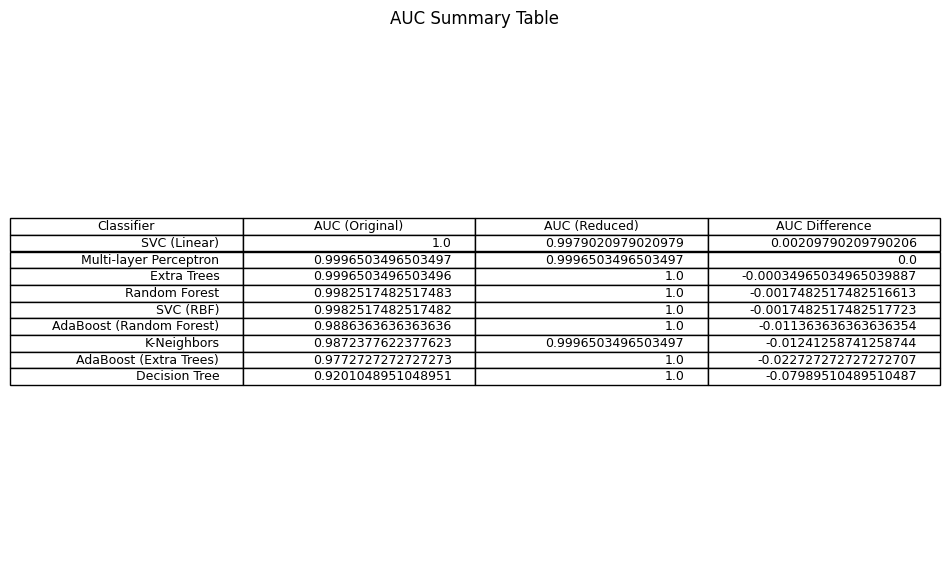

In [45]:
# Create a dictionary to store the AUC scores for both original and reduced datasets
auc_results = []

# Loop through the classifiers
for name, clf in classifiers.items():

    # Train and evaluate the classifier on the original dataset
    clf.fit(X_train_orig, y_train_orig)
    y_scores_orig = clf.predict_proba(X_test_orig)[:, 1] if hasattr(clf, "predict_proba") else clf.decision_function(X_test_orig)

    # Get probability scores if the classifier supports predict_proba, else use decision_function()
    auc_score_orig = roc_auc_score(y_test_orig, y_scores_orig)

   # Train and evaluate the classifier on the reduced dataset
    clf.fit(X_train_red, y_train_red)
    y_scores_red = clf.predict_proba(X_test_red)[:, 1] if hasattr(clf, "predict_proba") else clf.decision_function(X_test_red)

    # Get probability scores if available, else use decision_function()
    auc_score_red = roc_auc_score(y_test_red, y_scores_red)

    # Store AUC results in a dictionary
    auc_results.append({"Classifier": name, "AUC (Original)": auc_score_orig, "AUC (Reduced)": auc_score_red})

# Convert the results into a DataFrame for better visualization
auc_df = pd.DataFrame(auc_results)

# Compute the difference between original and reduced AUC scores
auc_df["AUC Difference"] = auc_df["AUC (Original)"] - auc_df["AUC (Reduced)"] 

# Sort classifiers based on AUC of the original dataset in descending order
auc_df = auc_df.sort_values(by="AUC (Original)", ascending=False) 


# Display the table using a matplotlib figure
fig, ax = plt.subplots(figsize=(12, 7)) 
ax.axis("tight")
ax.axis("off")
table = ax.table(cellText=auc_df.values, colLabels=auc_df.columns, loc="center")

plt.title("AUC Summary Table")
plt.show()


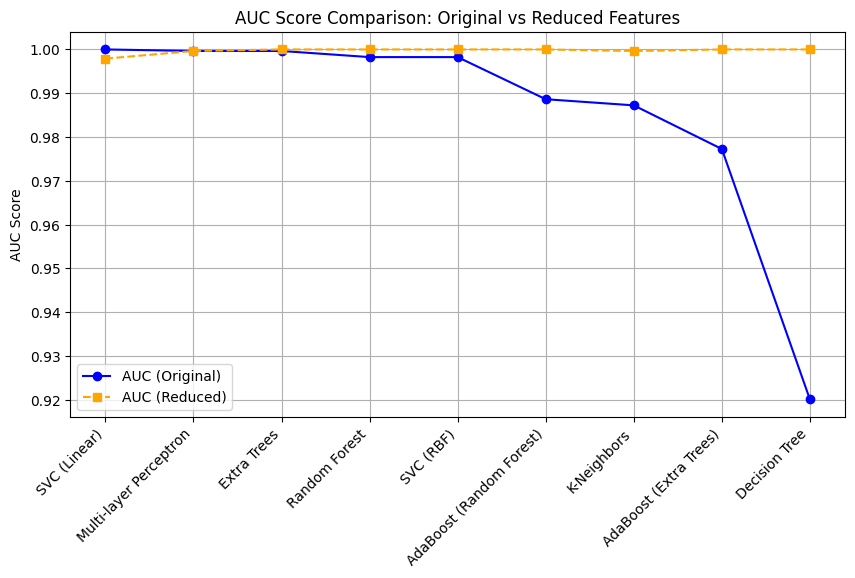

In [46]:
# Extract classifier names as a list
classifier = list(auc_df["Classifier"])

# Extract AUC scores for original and reduced datasets
auc_orig = list(auc_df["AUC (Original)"])  
auc_red = list(auc_df["AUC (Reduced)"])

# Create a figure for the plot
plt.figure(figsize=(10, 5))

# Plot AUC scores for the original dataset
plt.plot(classifier, auc_orig, marker='o', linestyle='-', label="AUC (Original)", color='blue')

# Plot AUC scores for the reduced dataset
plt.plot(classifier, auc_red, marker='s', linestyle='--', label="AUC (Reduced)", color='orange')

# Formatting the plot
plt.xticks(rotation=45, ha="right")
plt.ylabel("AUC Score")
plt.title("AUC Score Comparison: Original vs Reduced Features")
plt.legend()

# Enable grid for better visualization and display the plot
plt.grid(True)
plt.show()

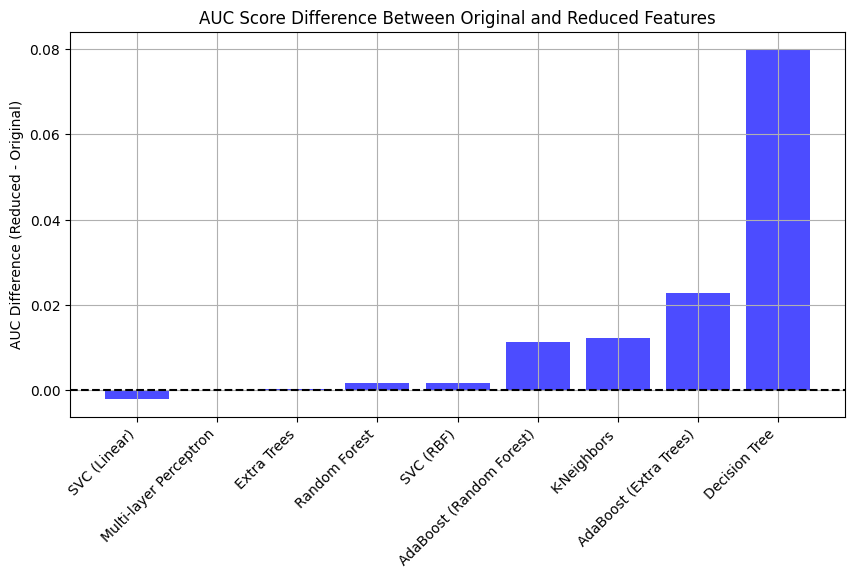

In [47]:
# Compute the difference in AUC scores between the reduced and original datasets
auc_difference = np.array(auc_red) - np.array(auc_orig)

# Create a bar plot to visualize the AUC score differences
plt.figure(figsize=(10, 5))

# Plot the AUC differences using a bar chart
plt.bar(classifier, auc_difference, color='blue', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Set y-axis label to describe the AUC difference
plt.ylabel("AUC Difference (Reduced - Original)")

# Set the title of the bar chart and display it 
plt.title("AUC Score Difference Between Original and Reduced Features")
plt.axhline(y=0, color="black", linestyle="--")  # Reference line
plt.grid(True)
plt.show()

In [48]:
# Display the AUC dataframe to check classifier performance
print(auc_df)

                 Classifier  AUC (Original)  AUC (Reduced)  AUC Difference
6              SVC (Linear)        1.000000       0.997902        0.002098
7    Multi-layer Perceptron        0.999650       0.999650        0.000000
2               Extra Trees        0.999650       1.000000       -0.000350
0             Random Forest        0.998252       1.000000       -0.001748
5                 SVC (RBF)        0.998252       1.000000       -0.001748
1  AdaBoost (Random Forest)        0.988636       1.000000       -0.011364
8               K-Neighbors        0.987238       0.999650       -0.012413
3    AdaBoost (Extra Trees)        0.977273       1.000000       -0.022727
4             Decision Tree        0.920105       1.000000       -0.079895


In [49]:
# Display what column names are with in the Data Frame data set before conducting next steps 
print(auc_df.columns)

Index(['Classifier', 'AUC (Original)', 'AUC (Reduced)', 'AUC Difference'], dtype='object')


In [50]:
threshold = 0.01
max_auc_orig=auc_df["AUC (Original)"].max()
top_classifiers_orig = auc_df[auc_df["AUC (Original)"] >= max_auc_orig - threshold ]
max_auc_red = auc_df["AUC (Reduced)"].max()
top_classifiers_red = auc_df[auc_df["AUC (Reduced)"] >= max_auc_red - threshold]

# Print results in the desired format
print("Best Classifiers (Original Data):")
for classifier in top_classifiers_orig["Classifier"]:
    print(f"- {classifier}")

print("\nBest Classifiers (Reduced Data):")
for classifier in top_classifiers_red["Classifier"]:
    print(f"- {classifier}")

Best Classifiers (Original Data):
- SVC (Linear)
- Multi-layer Perceptron
- Extra Trees
- Random Forest
- SVC (RBF)

Best Classifiers (Reduced Data):
- SVC (Linear)
- Multi-layer Perceptron
- Extra Trees
- Random Forest
- SVC (RBF)
- AdaBoost (Random Forest)
- K-Neighbors
- AdaBoost (Extra Trees)
- Decision Tree


In [51]:
# Filter top classifiers that support feature importance
def supports_feature_importance(clf):
    return hasattr(classifiers[clf], "feature_importances_")

# Select best classifiers from original data that support feature importance
top_classifiers_orig = auc_df[auc_df["AUC (Original)"] == auc_df["AUC (Original)"].max()]
top_classifiers_orig = top_classifiers_orig[top_classifiers_orig["Classifier"].apply(supports_feature_importance)]

# Select best classifiers from reduced data that support feature importance
top_classifiers_red = auc_df[auc_df["AUC (Reduced)"] == auc_df["AUC (Reduced)"].max()]
top_classifiers_red = top_classifiers_red[top_classifiers_red["Classifier"].apply(supports_feature_importance)]

# If no classifiers in the top support feature importance, pick the next best ones
if top_classifiers_orig.empty:
    top_classifiers_orig = auc_df[auc_df["Classifier"].apply(supports_feature_importance)].nlargest(1, "AUC (Original)")

if top_classifiers_red.empty:
    top_classifiers_red = auc_df[auc_df["Classifier"].apply(supports_feature_importance)].nlargest(1, "AUC (Reduced)")

# Retrieve best classifier names
best_classifier_orig_name = top_classifiers_orig["Classifier"].values[0]
best_classifier_red_name = top_classifiers_red["Classifier"].values[0]

# Retrieve classifier objects
best_classifier_orig = classifiers[best_classifier_orig_name]
best_classifier_red = classifiers[best_classifier_red_name]

# Display the best identified classifieres from the original and reduced data sets that support feature importance 
print(f"Best Classifier (Original Data) Supporting Feature Importance: {best_classifier_orig_name}")
print(f"Best Classifier (Reduced Data) Supporting Feature Importance: {best_classifier_red_name}")


Best Classifier (Original Data) Supporting Feature Importance: Extra Trees
Best Classifier (Reduced Data) Supporting Feature Importance: Extra Trees


In [52]:
def plot_importance(ax, classifier, feature_names, title, classifier_name):
    """
    Plots feature importance if the classifier supports it.
    """
    # Check if classifier supports feature importance
    if hasattr(classifier, "feature_importances_"):
        # Extract feature importance values
        importances = classifier.feature_importances_
        # Sort features by importance (descending order)
        indices = np.argsort(importances)[::-1]

        # Create bar chart with sorted feature importances
        ax.bar(range(len(importances)), importances[indices], align="center", alpha=0.7)
        ax.set_xticks(range(len(importances)))
        ax.set_xticklabels(np.array(feature_names)[indices], rotation=45)
        ax.set_ylabel("Importance")
        ax.set_title(f"{title} ({classifier_name})")
    else:
        # Display message if classifier does not support feature importance
        ax.set_title(f"{title} ({classifier_name})\n(Classifier does not support feature importance)")
        ax.set_xticks([])
        ax.set_yticks([])

In [53]:
# Create function which plots feature importance 
def plot_importance(ax, classifier, feature_names, title, classifier_name):

    # Check if classifier supports feature importance
    if hasattr(classifier, "feature_importances_"):

        # Extract feature importance values
        importances = classifier.feature_importances_

        # Sort features by importance (descending order)
        indices = np.argsort(importances)[::-1] 
        
        # Create bar chart with sorted feature importances
        ax.bar(range(len(importances)), importances[indices], align="center", alpha=0.7)
        ax.set_xticks(range(len(importances)))
        ax.set_xticklabels(np.array(feature_names)[indices], rotation=45)
        ax.set_ylabel("Importance")
        ax.set_title(f"{title} ({classifier_name})")
    else:

        # Display message if classifier does not support feature importance
        ax.set_title(f"{title} ({classifier_name})\n(Classifier does not support feature importance)")
        ax.set_xticks([])
        ax.set_yticks([])

In [54]:
# Convert training data arrays into Pandas DataFrames for later use in the feature importance plot
X_train_orig_df = pd.DataFrame(X_train_orig)
X_train_red_df = pd.DataFrame(X_train_red)

In [55]:
# Extract feature names from DataFrames for later use in the feature importance plot
feature_names_orig = X_train_orig_df.columns
feature_names_red = X_train_red_df.columns

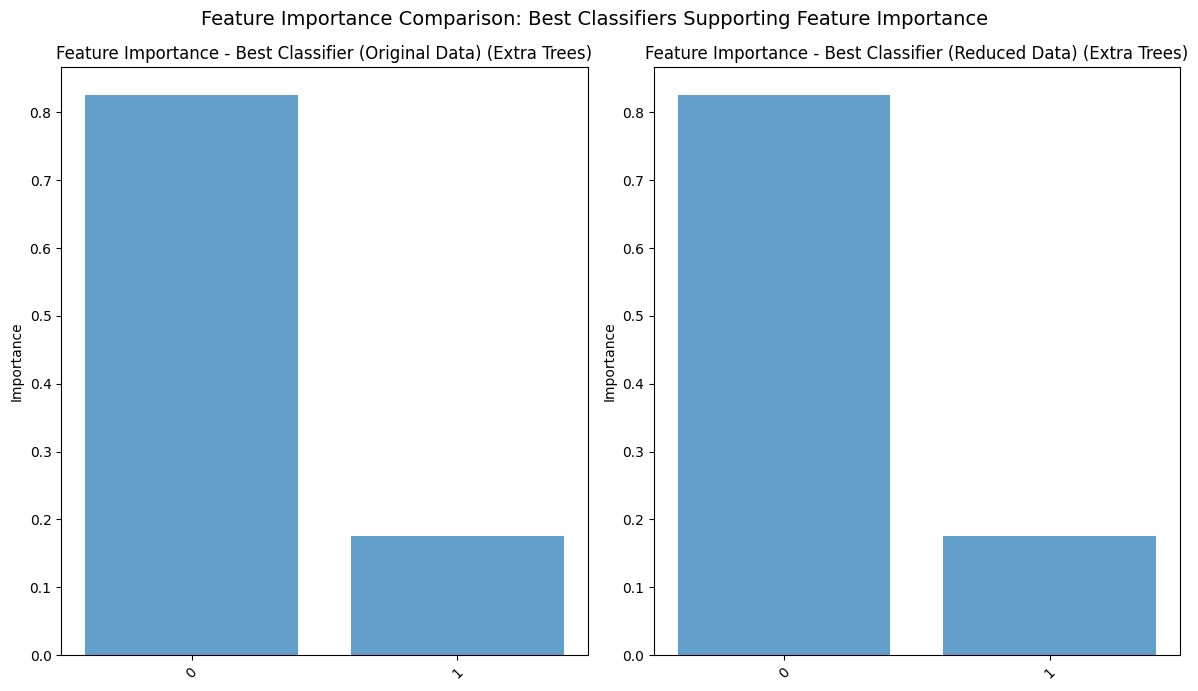

In [56]:
# Generate subplots for feature importance visualization 
fig, axes = plt.subplots(1, 2, figsize=(12, 7))

# Plot feature importance for best classifiers from orinial and reduced datasets
plot_importance(axes[0], best_classifier_orig, feature_names_orig, "Feature Importance - Best Classifier (Original Data)", best_classifier_orig_name)
plot_importance(axes[1], best_classifier_red, feature_names_red, "Feature Importance - Best Classifier (Reduced Data)", best_classifier_red_name)

# Display
fig.suptitle("Feature Importance Comparison: Best Classifiers Supporting Feature Importance", fontsize=14)
plt.tight_layout()
plt.show()